[Reference](https://medium.com/@nishi.paul.in/visualization-using-pandas-graphs-made-easy-67c281f16205)

In [1]:
import pandas as pd
import numpy as np

# Line Plots

In [2]:
series_data = pd.Series(np.random.randn(500), index = pd.date_range("08/1/2023", periods = 500))

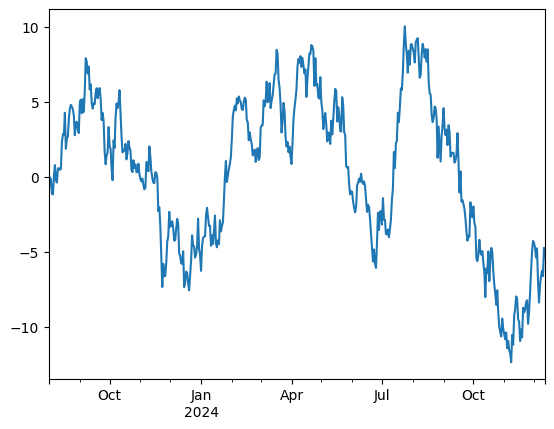

In [3]:
series_data.cumsum().plot();

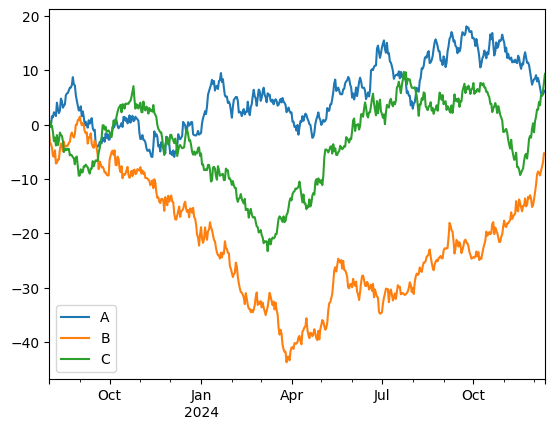

In [4]:
dataframe_data = pd.DataFrame(np.random.randn(500,3), index = series_data.index, columns= list("ABC"))
dataframe_data.cumsum().plot();

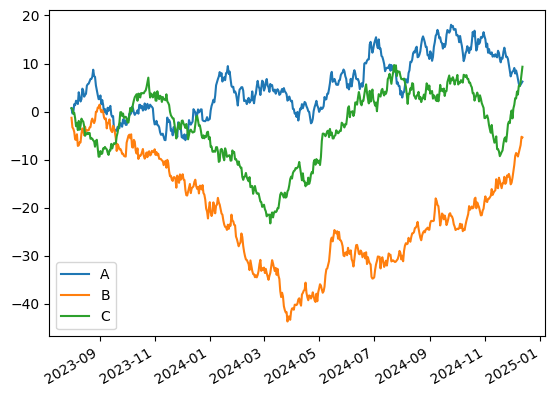

In [5]:
#Introduction the parameter of x_compact; look into the change of x axis
dataframe_data.cumsum().plot(x_compat = True);

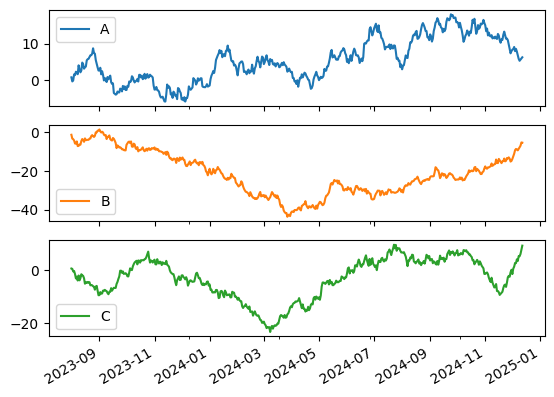

In [6]:
#We can create subplots too using parameter subplots = True
dataframe_data.cumsum().plot(subplots = True, x_compat = True);

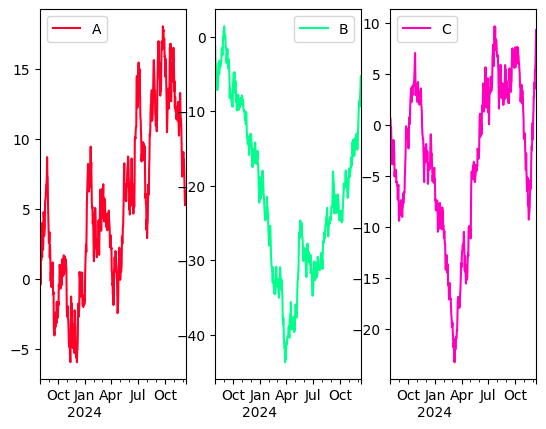

In [7]:
#We can fix the layout of subplot. Try changing (1,3) to (3,1) and you will
#see the subplots created as 3 rows and single column.
#sharex = True will cause all the graphs to share a single xaxis

dataframe_data.cumsum().plot(subplots = True, layout = (1,3), sharex = False, colormap="gist_rainbow");

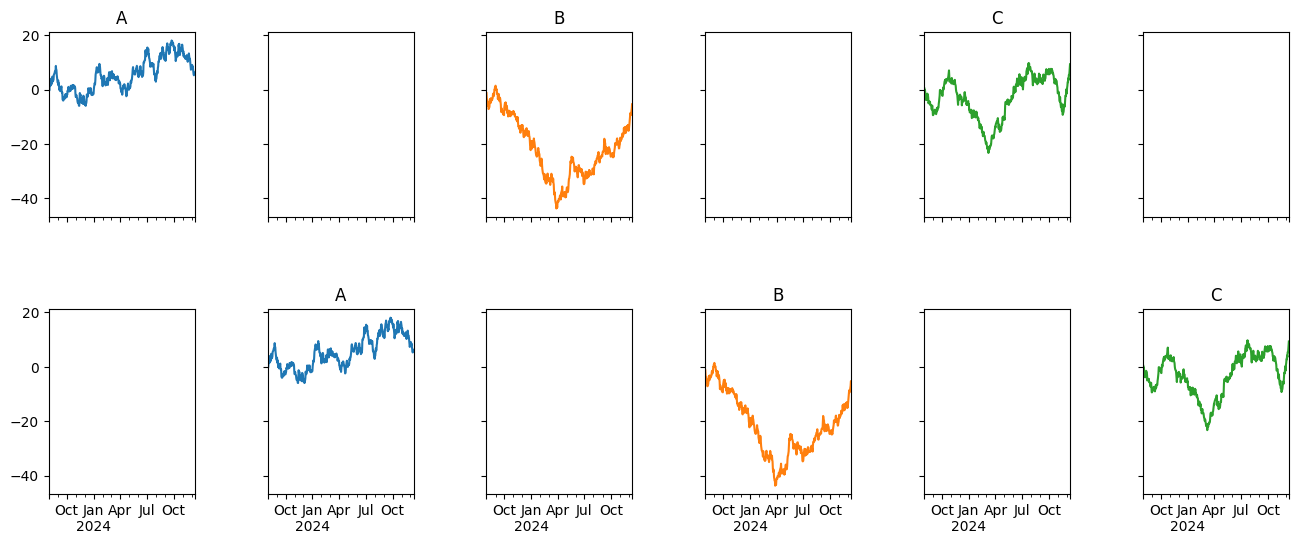

In [8]:
import matplotlib.pyplot as plt

#configuring subplots
#two rows and six column subplot is created
#sharex and sharey are set as True to share the x axis and y axis
fig, ax = plt.subplots(2,6, figsize = (16,6), sharex = True, sharey = True)
plt.subplots_adjust(wspace= 0.5, hspace=0.5)

#setting up the positions in subplots where we want to see our graph
#try changing the positions, but it has to be within the row x column defined in subplot
figure1 = [ax[0][0], ax[0][2], ax[0][4]]
figure2 = [ax[1][1], ax[1][3], ax[1][5]]

#creating the graphs setting the axes of the subplot with the positions defined
#legend is set as False, turn it to True to see the difference
dataframe_data.cumsum().plot(subplots = True, ax = figure1, legend = False)
dataframe_data.cumsum().plot(subplots = True, ax = figure2, legend = False)

#Title to the individual graphs in subplots are set as per positions
ax[0, 0].set_title("A")
ax[1,1].set_title("A")
ax[0, 2].set_title("B")
ax[1, 3].set_title("B")
ax[0, 4].set_title("C")
ax[1,5].set_title("C");

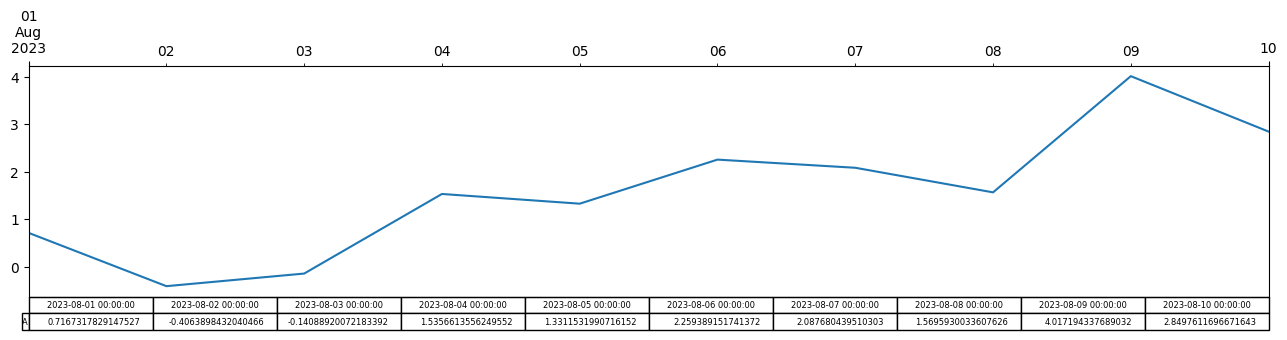

In [9]:
fig, ax = plt.subplots(1, 1, figsize = (16,3))

#this is to set the x axis values to the top
ax.xaxis.tick_top()

#10 rows from column A is taken and table = True parameter will show the table
#corresponding to the selected values
dataframe_data['A'][:10].cumsum().plot(table = True, ax = ax);

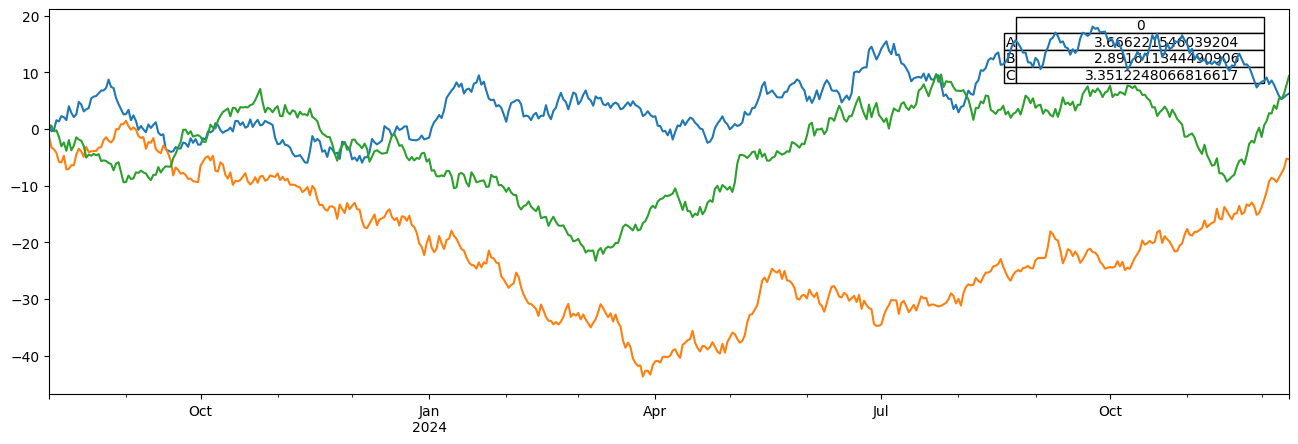

In [10]:
fig, ax = plt.subplots(1, 1, figsize = (16,5))

#plotting table in the axis set as per subplot. Location is fixed at upper right
pd.plotting.table(ax, dataframe_data.max(), loc = "upper right", colWidths = [0.2, 0.2, 0.2])
dataframe_data.cumsum().plot(ax=ax, legend = None);

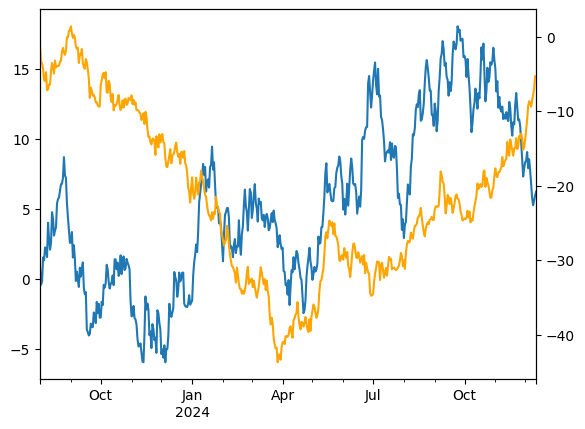

In [11]:
#A line chart with A column is plotted having y axis values to the left as normal
dataframe_data['A'].cumsum().plot()

#Another column of B is plotted in the same graph but now with a secondary y axis to theright
dataframe_data['B'].cumsum().plot(secondary_y = True, color = 'orange');

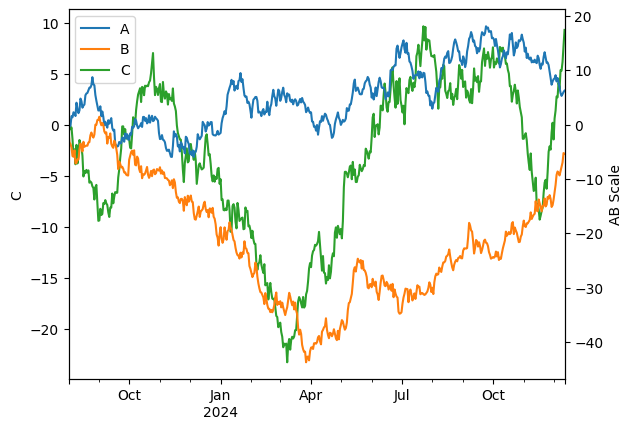

In [12]:
#Secondary y axis is assigned with the columns of A and B
#Thus, automatically the left out column of C will show up on the left y axis
ax = dataframe_data.cumsum().plot(secondary_y = ['A', 'B'], mark_right = False)
ax.set_ylabel('C')
ax.right_ax.set_ylabel('AB Scale');

# Bar Plot

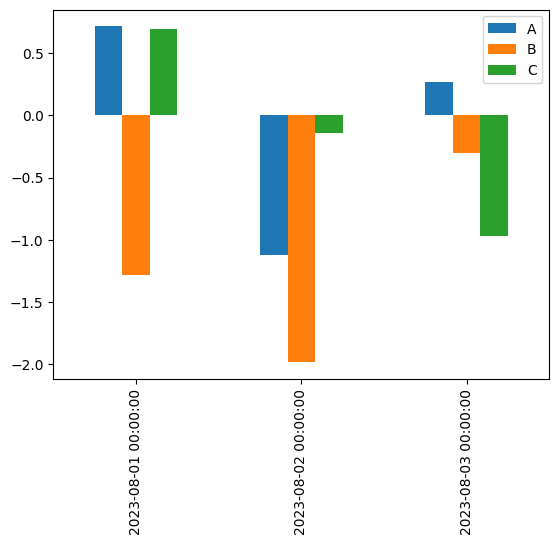

In [13]:
#One way of creating bar plot
dataframe_data.iloc[:3].plot(kind = 'bar');

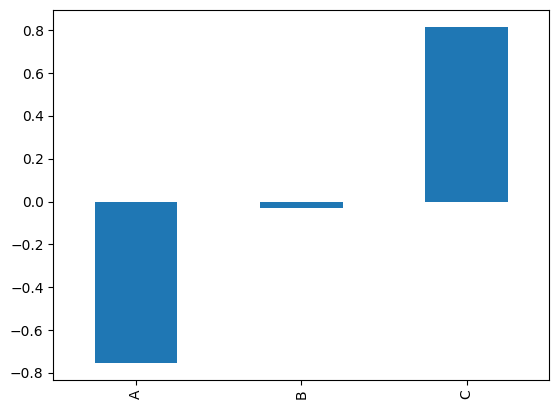

In [14]:
#Second way of creating bar plot
dataframe_data.iloc[10].plot.bar();

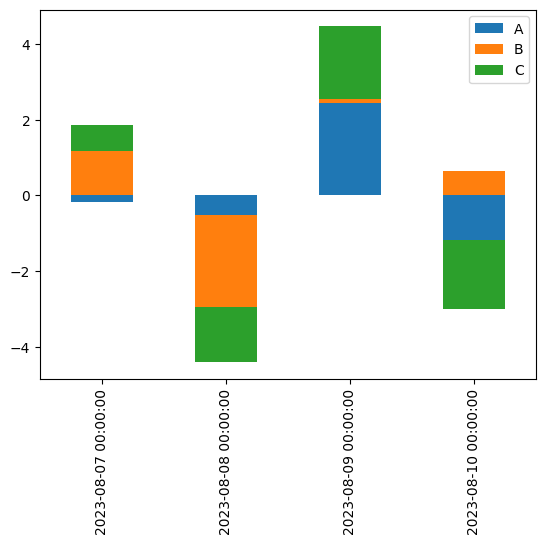

In [15]:
#For showing up all the columns stacked as per index
dataframe_data.iloc[6:10].plot.bar(stacked = True);

<Axes: >

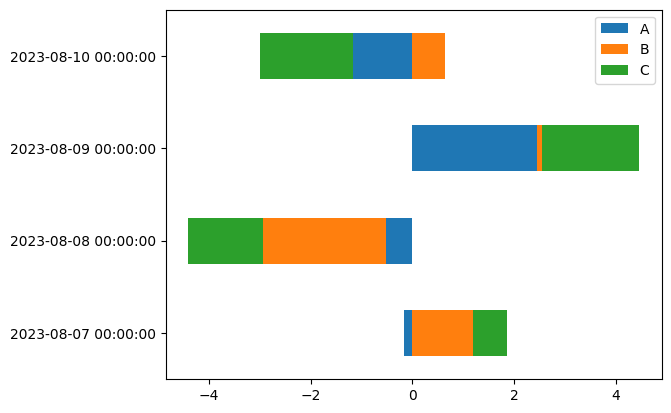

In [16]:
#Horizontal and stacked
dataframe_data.iloc[6:10].plot.barh(stacked = True)

# Histograms

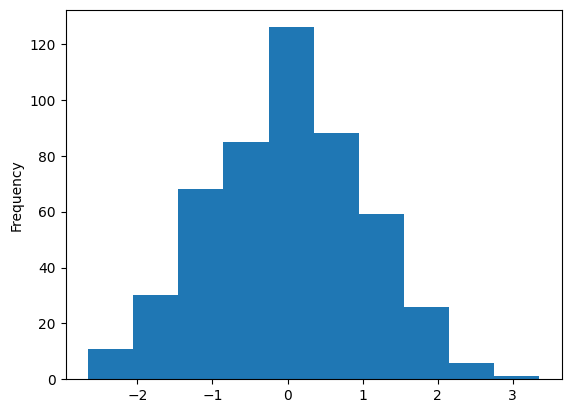

In [17]:
#For a particular column
dataframe_data['C'].plot.hist();

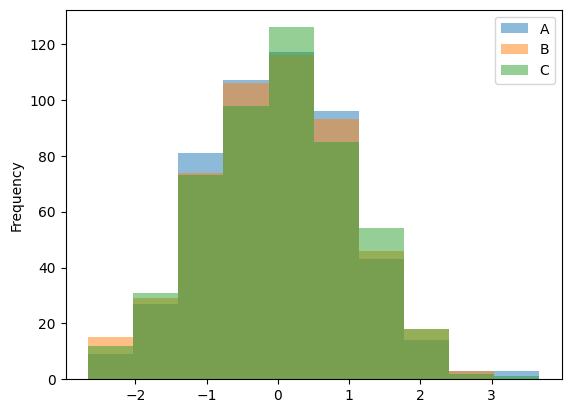

In [18]:
#For all columns
dataframe_data.plot.hist(alpha = 0.5);

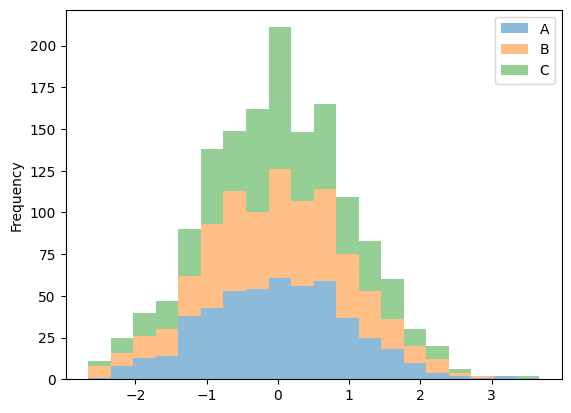

In [19]:
#stacked histogram
dataframe_data.plot.hist(stacked = True, bins = 20, alpha = 0.5);

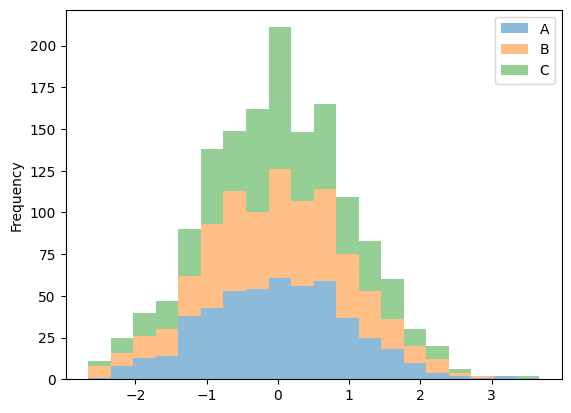

In [20]:
#stacked histogram
dataframe_data.plot.hist(stacked = True, bins = 20, alpha = 0.5);

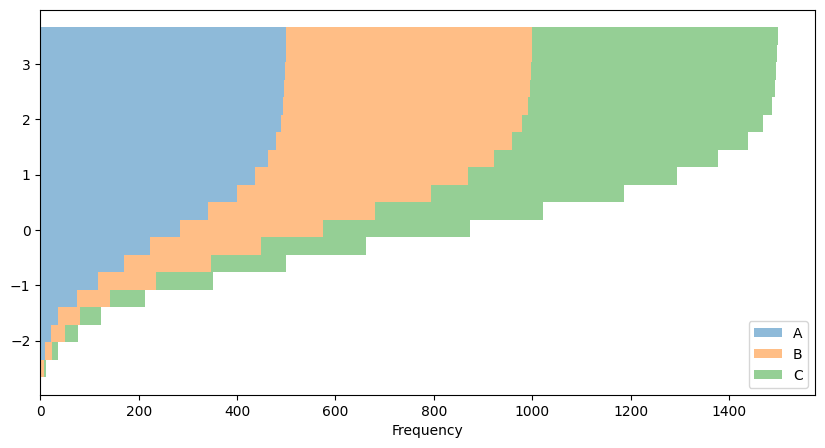

In [21]:
#For plotting cumulative and stacked histograms
dataframe_data.plot.hist(stacked = True, bins = 20, alpha = 0.5, orientation = "horizontal", cumulative = True, figsize = (10,5));

# Box Plots

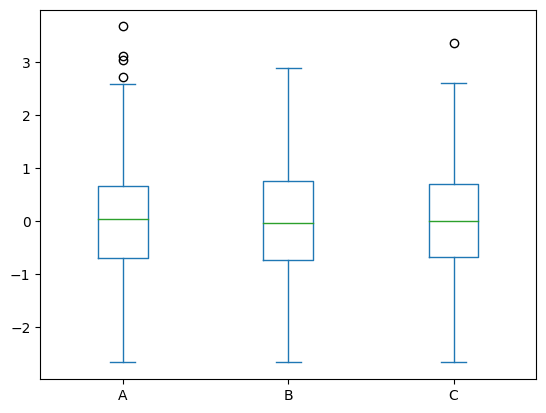

In [22]:
dataframe_data.plot.box();

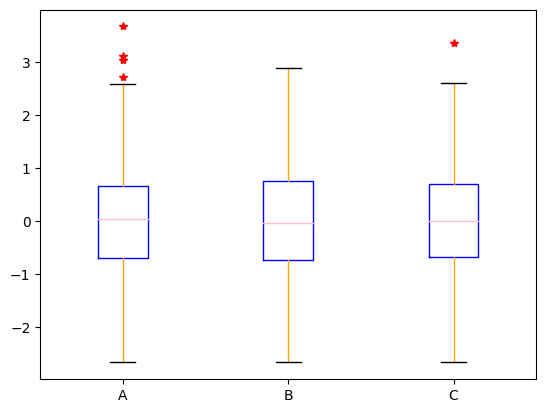

In [23]:
#colors could be adjusted as below; these are the four dictionary keys recognizable by the bar plot
color = {
    "boxes": "Blue",
    "whiskers": "Orange",
    "medians": "Pink",
    "caps": "Black",
}

dataframe_data.plot.box(color = color, sym = 'r*');

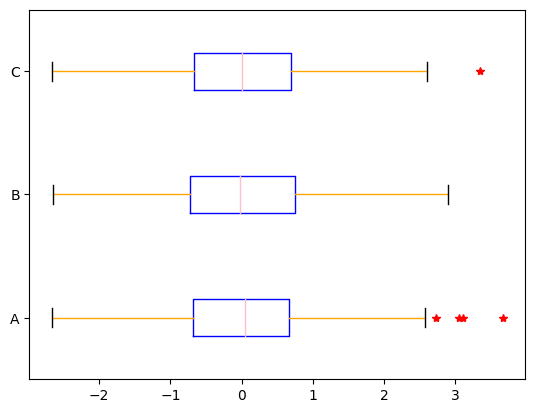

In [24]:
dataframe_data.plot.box(color = color, sym = 'r*', vert = False);

# Area Plot

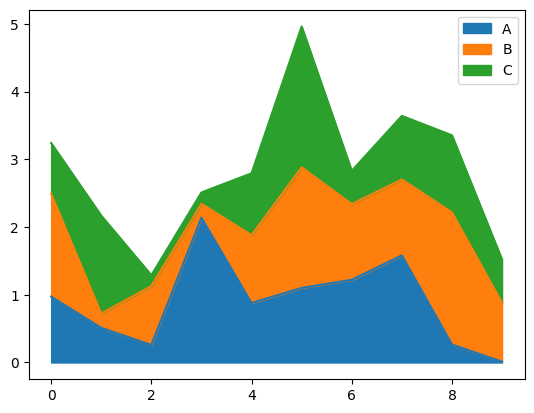

In [25]:
df = pd.DataFrame(abs(np.random.randn(10, 3)), columns = list('ABC'))
df.plot.area();

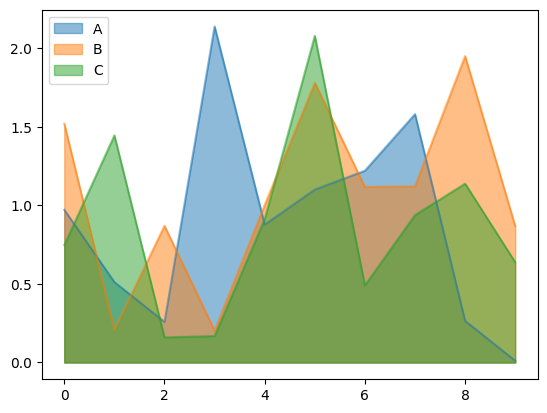

In [26]:
df.plot.area(stacked=False, alpha = 0.5);

# Scatter Plot

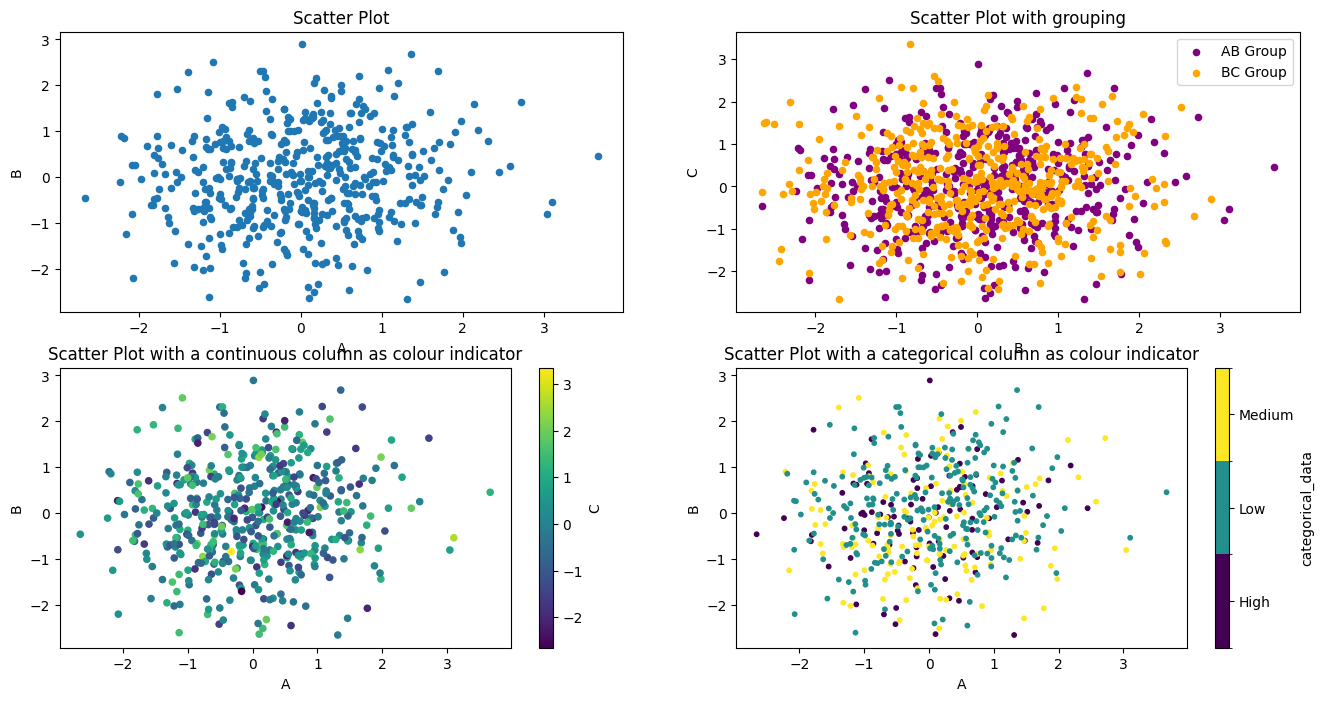

In [27]:
#creating categorical data column which we will use to categorize by colour in scatter plot
dataframe_data['categorical_data'] = pd.Categorical(['High']*100 + ['Medium']*150 + ['Low'] * 250)

#configuring subplot
fig, ax = plt.subplots(2,2, figsize = (16, 8))

#creating individual scatter plots by specifying the axes position on subplots
dataframe_data.plot.scatter(x = 'A', y = 'B', ax = ax[0][0])
ax[0][0].set_title('Scatter Plot')

dataframe_data.plot.scatter(x='A', y='B', color = 'purple', label = 'AB Group', ax = ax[0][1])
dataframe_data.plot.scatter(x = 'B', y = 'C', color = 'orange', label = 'BC Group', ax = ax[0][1])
ax[0][1].set_title('Scatter Plot with grouping')

dataframe_data.plot.scatter('A', 'B', c = 'C', ax = ax[1][0])
ax[1][0].set_title('Scatter Plot with a continuous column as colour indicator')

dataframe_data.plot.scatter('A', 'B', c= 'categorical_data', cmap = 'viridis', s = 10, ax = ax[1][1])
ax[1][1].set_title('Scatter Plot with a categorical column as colour indicator');

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


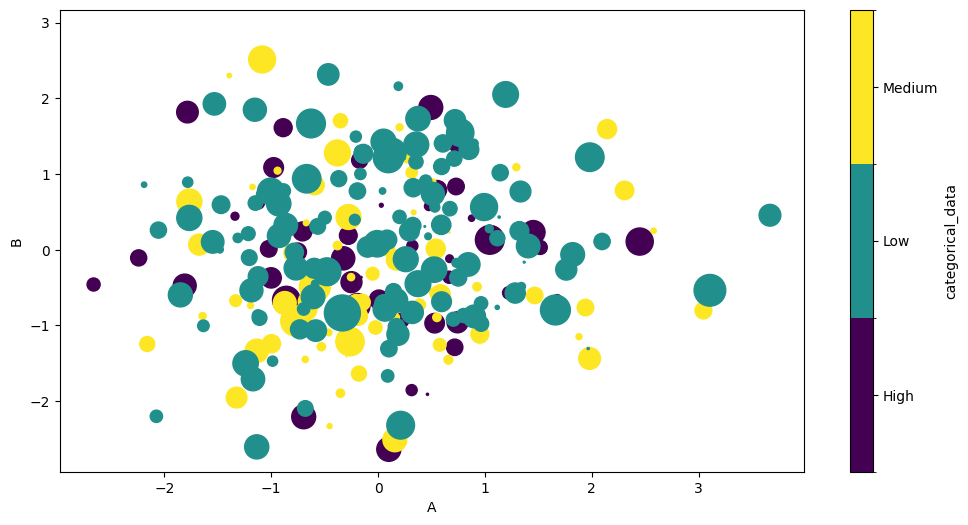

In [28]:
#here we are using color map and color as the categorical data column.
#size of the bubbles are the values from column C multiplied by 200
dataframe_data.plot.scatter('A', 'B', c= 'categorical_data', cmap = 'viridis', s = dataframe_data['C']*200, figsize = (12, 6));

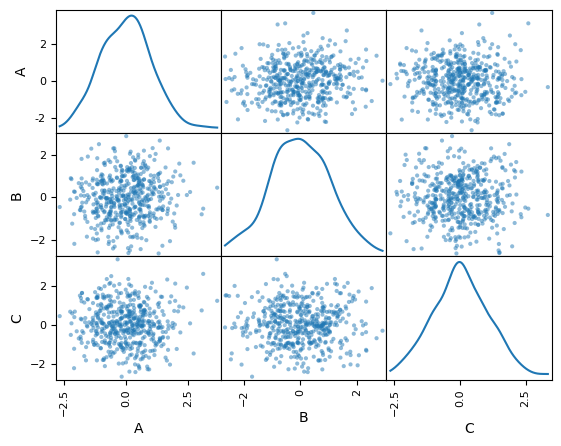

In [29]:
#we can create density scatter plot too

pd.plotting.scatter_matrix(dataframe_data, diagonal = 'kde');

# Hexagonal Bin Plot

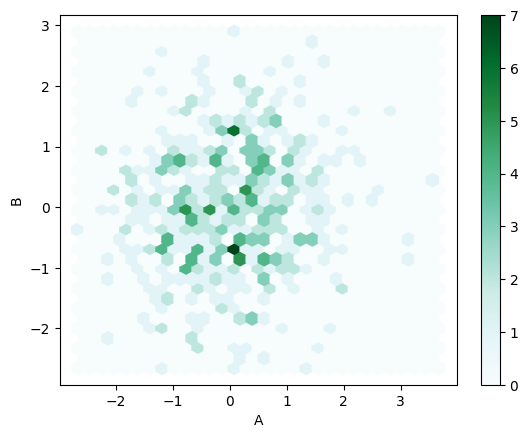

In [30]:
dataframe_data.plot.hexbin('A', 'B', gridsize = 30);

<Axes: xlabel='A', ylabel='B'>

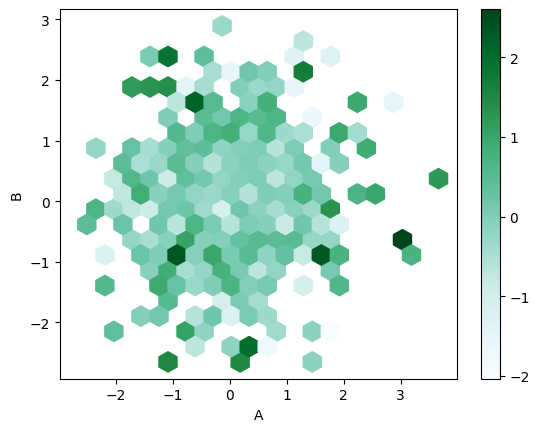

In [31]:
dataframe_data.plot.hexbin('A', 'B', C = 'C', gridsize=20)

# Pie Plot


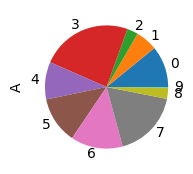

In [32]:
df['A'].plot.pie(figsize = (2,2));

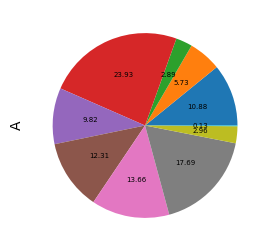

In [33]:
df.plot.pie(y = 'A', figsize = (3,3), legend = False, labels = None, autopct="%.2f", fontsize=5);

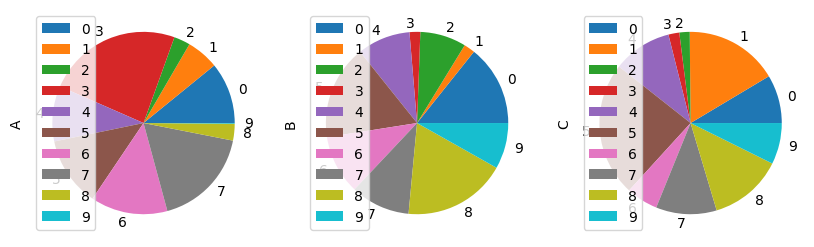

In [34]:
df.plot.pie(subplots=True, figsize = (10,10));

# Density plot

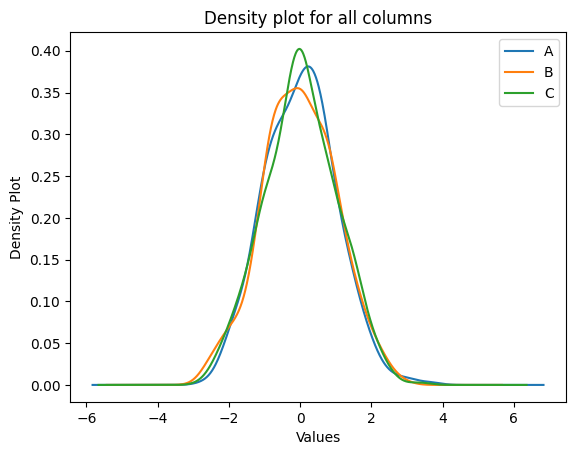

In [35]:
dataframe_data.plot.kde()
plt.xlabel('Values')
plt.ylabel('Density Plot')
plt.title('Density plot for all columns');